In [3]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

import os
os.environ['R_HOME'] = 'D:/Program Files/R-4.5.0' #@TODO include in some setup file

from simulation_engine.scenarios.iv.binary_iv import BinaryIV
from simulation_engine.scenarios.iv.continuous_iv import ContinuousIV
from simulation_engine.scenarios.iv.base_iv import IVScenario
from simulation_engine.util.plotting_util import PlottingUtil
from simulation_engine.algorithms.causaloptim import Causaloptim
import pandas as pd
pd.set_option('display.max_columns', None)

#disable warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from simulation_engine.algorithms.zaffalonbounds import ZaffalonBounds

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [166]:
function_keys = [
                "identity",
                "sin",
                "cos",
                "tanh",
                "log1p_abs",
                "exp_neg_sq",
                "sigmoid",
                "exp_clipped"
            ]

# data = ContinuousIV.run_rolling_b_X_Y_simulations(
#     b_range=(-5, 5), N_points=100, replications=20, n=500,
#     # allowed_functions=['identity']
# )
data = BinaryIV.generate_data_rolling_ate()
data

,seed,intercept_X,intercept_Y,b_Z_X,b_U_X,b_X_Y,b_U_Y,ATE_true,PNS_true,p_Y1_mean,p_Y0_mean,p_U,p_Z,Z,U,X,Y,entropy_Z,entropy_U,entropy_X,entropy_Y,sigma_X,sigma_Y,squasher_name
0,991738,0,0,0.686732,0.781357,-5.000000,-0.494447,-0.476947,0.003235,0.006334,0.483281,0.161465,0.433014,"[1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, ...","[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, ...",0.981454,0.578977,0.988149,0.801629,1.167872,1.101627,sigmoid
1,496486,0,0,-1.294453,-0.083419,-4.994997,-0.514483,-0.378733,0.002582,0.004220,0.382953,0.921713,0.440004,"[0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...","[1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, ...",0.994407,0.365924,0.953694,0.804876,1.020371,0.977184,sigmoid
2,832790,0,0,-1.264562,-0.287829,-4.989995,0.511869,-0.515463,0.003532,0.007582,0.523045,0.186261,0.289448,"[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, ...","[1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, ...","[0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, ...",0.871291,0.688750,0.972109,0.924819,0.393966,0.943271,sigmoid
3,790458,0,0,1.262531,0.928511,-4.984992,1.770092,-0.591315,0.011743,0.033713,0.625028,0.864809,0.419638,"[0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, ...","[1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, ...","[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",0.984141,0.568307,0.972109,0.841465,1.420642,1.032695,softplus
4,324948,0,0,0.064336,-0.529925,-4.979990,0.369298,-0.505177,0.003497,0.007238,0.512415,0.117510,0.900546,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, ...","[1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, ...","[0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, ...",0.511865,0.573667,0.999584,0.801629,1.085265,0.275223,sigmoid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,332474,0,0,0.756973,-0.075369,4.979990,-1.093455,0.525235,0.528871,0.991367,0.466132,0.121132,0.752043,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, ...","[1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, ...","[1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, ...",0.858162,0.573667,0.976500,0.781481,0.259309,1.245747,sigmoid
1996,478926,0,0,-1.266389,-0.440148,4.984992,-1.096923,0.423722,0.492046,0.833105,0.409384,0.002655,0.512026,"[1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, ...","[1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, ...",0.997402,-0.000000,0.914926,0.999896,0.389511,2.375129,softplus
1997,461500,0,0,0.894504,-0.998560,4.989995,0.562455,0.499574,0.499574,1.000000,0.500426,0.003657,0.409328,"[1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, ...","[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...",0.970951,0.020814,0.944331,0.680077,0.466078,1.711407,probit
1998,765747,0,0,-0.747547,-0.316089,4.994997,-0.022510,0.505747,0.505747,1.000000,0.494253,0.632446,0.755652,"[1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, ...","[0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, ...","[0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, ...",0.808093,0.942683,0.814433,0.949124,0.055445,1.558277,probit


In [167]:
pd.DataFrame(data.iloc[80]['X']).describe()
data['X_mean'].describe()

KeyError: 'X_mean'

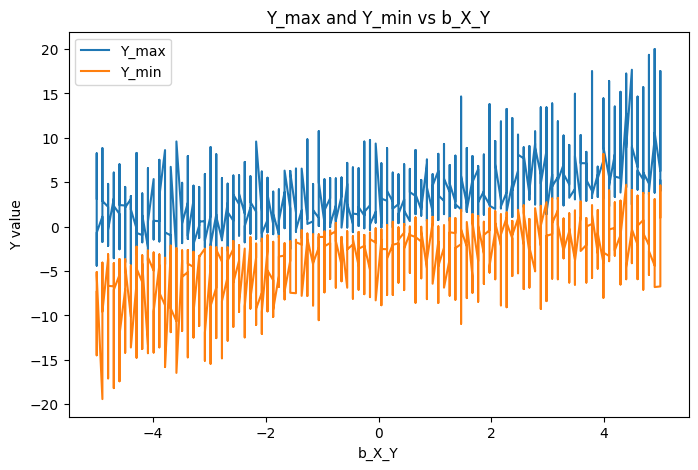

In [162]:
import matplotlib.pyplot as plt

y_label = 'Y'
plt.figure(figsize=(8, 5))
plt.plot(data['b_X_Y'], data[f'{y_label}_max'], label=f'{y_label}_max')
plt.plot(data['b_X_Y'], data[f'{y_label}_min'], label=f'{y_label}_min')
# plt.plot(data['b_X_Y'], data[f'{y_label}_mean'], 'o-', label=f'{y_label}_mean')
plt.xlabel('b_X_Y')
plt.ylabel(f'{y_label} value')
plt.title(f'{y_label}_max and {y_label}_min vs b_X_Y')
plt.legend()
plt.show()

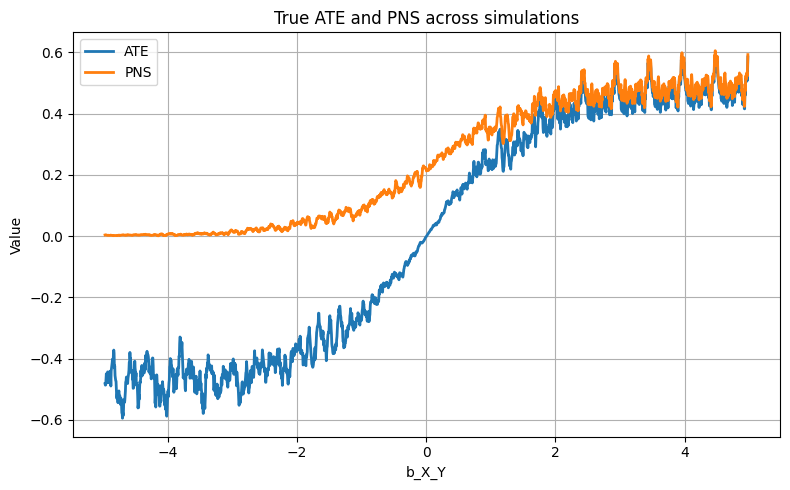

In [ ]:
PlottingUtil.plot_ate_pns(data, window=30)

In [4]:
binaryIV = BinaryIV('IV Dag', data)

algorithms = [alg for alg in binaryIV.get_algorithms('ATE') if 'zaffalonbounds' not in alg]
algorithms
runtimes = binaryIV.run_all_bounding_algorithms(algorithms)

Running ATE_2SLS-0.99...
ATE_2SLS-0.99 completed in 0.19 seconds.
Running ATE_2SLS-0.98...
ATE_2SLS-0.98 completed in 0.25 seconds.
Running ATE_causaloptim...
ATE_causaloptim completed in 6.28 seconds.
Running ATE_autobound...
ATE_autobound completed in 4.71 seconds.
Running ATE_entropybounds-0.80...
ATE_entropybounds-0.80 completed in 0.59 seconds.
Running ATE_entropybounds-0.20...
ATE_entropybounds-0.20 completed in 0.59 seconds.
Running ATE_entropybounds-0.10...
ATE_entropybounds-0.10 completed in 0.63 seconds.
Running ATE_nonpara...
ATE_nonpara completed in 0.01 seconds.
Total runtime: 13.26 seconds.


             Algorithm Fail Rate (%) Invalid Rate (%) Net Bound Width
           PNS_nonpara          0.00            16.00          0.1784
       PNS_causaloptim          4.00             9.38          0.4198
         PNS_autobound          1.00             0.00          0.4283
PNS_entropybounds-0.10          0.00             0.00          0.5021
PNS_entropybounds-0.20          0.00             0.00          0.5752
PNS_entropybounds-0.80          0.00             0.00          0.7197
    PNS_zaffalonbounds           N/A              N/A             N/A


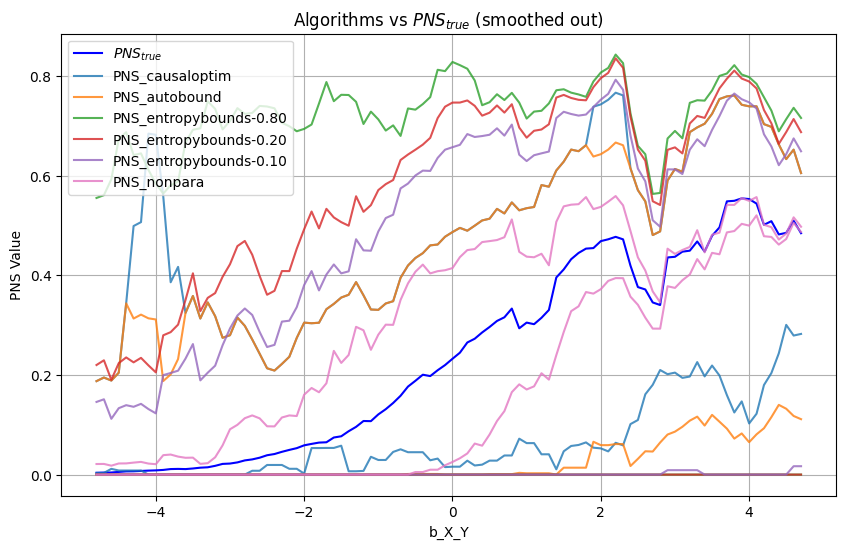

In [28]:
algorithms = list(runtimes['runtimes'].keys())
ate_algs = binaryIV.get_algorithms('PNS')
# PlottingUtil.print_bound_statistics(binaryIV.data, ate_algs)
PlottingUtil.print_bound_statistics_table(binaryIV.data, ate_algs)
PlottingUtil.plot_smoothed_query_vs_bounds(binaryIV.data, 'PNS', ate_algs, 5, False)